In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt

### Reference sample for trace 1 + more traces

In [ ]:
ref1 = pd.read_csv('data/feri_logy_analyza/200629_karting/kartfinal36pr3r.csv', header=None, sep=';')

In [ ]:
ref1 = ref1.drop(columns=[0, 1, 3, 5, 7, 9, 11, 13, 15, 17])
ref1.columns = ['LAT', 'LON', 'UTMX', 'UTMY', 'HMSL', 'GSPEED', 'CRS', 'HACC', 'NXPT']

In [ ]:
ref1

In [ ]:
traces1 = pd.read_csv('data/feri_logy_analyza/200629_karting/200629130554_gps.log', header=None, sep=';')

In [ ]:
traces1 = traces1.drop(columns=[0, 1, 3, 5, 7, 9, 11, 13, 15, 17])
traces1.columns = ['LAT', 'LON', 'UTMX', 'UTMY', 'HMSL', 'GSPEED', 'CRS', 'HACC', 'NXPT']

In [ ]:
fig = plt.figure()
for frame in [traces1, ref1]:
    plt.plot(frame['LON'], frame['LAT'])

### Reference sample for trace 2 + more traces

In [ ]:
ref2 = pd.read_csv('data/200623_academy/trasa23.csv', header=None, sep=';')
ref2 = ref2.drop(columns=[0, 1, 3, 5, 7, 9, 11, 13, 15, 17])
ref2.columns = ['LAT', 'LON', 'UTMX', 'UTMY', 'HMSL', 'GSPEED', 'CRS', 'HACC', 'NXPT']

In [ ]:
traces2 = pd.read_csv('data/200623_academy/200623111152_gps.log', header=None, sep=';')
traces2 = traces2.drop(columns=[0, 1, 3, 5, 7, 9, 11, 13, 15, 17])
traces2.columns = ['LAT', 'LON', 'UTMX', 'UTMY', 'HMSL', 'GSPEED', 'CRS', 'HACC', 'NXPT']

In [ ]:
fig2 = plt.figure()
for frame in [traces2, ref2]:
    plt.plot(frame['LON'], frame['LAT'])

In [ ]:
traces3 = pd.read_csv('data/200623_academy/200623121213_gps.log', header=None, sep=';')
traces3 = traces3.drop(columns=[0, 1, 3, 5, 7, 9, 11, 13, 15, 17])
traces3.columns = ['LAT', 'LON', 'UTMX', 'UTMY', 'HMSL', 'GSPEED', 'CRS', 'HACC', 'NXPT']

In [ ]:
fig3 = plt.figure()
for frame in [traces3, ref2]:
    plt.plot(frame['LON'], frame['LAT'])

### Data normalization

In [ ]:
# divide lat and lon by 10 000 000
for frame in [ref1, traces1, ref2, traces2, traces3]:
    frame['LAT'] = frame['LAT'].apply(lambda x: x * 0.0000001)
    frame['LON'] = frame['LON'].apply(lambda x: x * 0.0000001)

# ref1['LAT'] = ref1['LAT'].apply(lambda x: x * 0.0000001)
# ref1['LON'] = ref1['LON'].apply(lambda x: x * 0.0000001)
# traces1['LAT'] = traces1['LAT'].apply(lambda x: x * 0.0000001)
# traces1['LON'] = traces1['LON'].apply(lambda x: x * 0.0000001)
# ref2['LAT'] = ref2['LAT'].apply(lambda x: x * 0.0000001)
# ref2['LON'] = ref2['LON'].apply(lambda x: x * 0.0000001)
# traces2['LAT'] = traces2['LAT'].apply(lambda x: x * 0.0000001)
# traces2['LON'] = traces2['LON'].apply(lambda x: x * 0.0000001)
# traces3['LAT'] = traces3['LAT'].apply(lambda x: x * 0.0000001)
# traces3['LON'] = traces3['LON'].apply(lambda x: x * 0.0000001)

In [ ]:
ref1

In [ ]:
fig = plt.figure()
for frame in [traces1, ref1]:
    plt.plot(frame['LON'], frame['LAT'])

OK, so far so good

In [ ]:
# divide gspeed by 100 (cm/s -> m/s)
for frame in [ref1, traces1, ref2, traces2, traces3]:
    frame['GSPEED'] = frame['GSPEED'].apply(lambda x: x * 0.01)

# ref1['GSPEED'] = ref1['GSPEED'].apply(lambda x: x * 0.01)
# traces1['GSPEED'] = traces1['GSPEED'].apply(lambda x: x * 0.01)
# ref2['GSPEED'] = ref2['GSPEED'].apply(lambda x: x * 0.01)
# traces2['GSPEED'] = traces2['GSPEED'].apply(lambda x: x * 0.01)
# traces3['GSPEED'] = traces3['GSPEED'].apply(lambda x: x * 0.01)

In [ ]:
ref1

In [ ]:
# divide crs by 100 000
for frame in [ref1, traces1, ref2, traces2, traces3]:
    frame['CRS'] = frame['CRS'].apply(lambda x: x * 0.00001)

In [ ]:
ref1

In [ ]:
# drop unnecessary columns
ref1 = ref1.drop(columns=['UTMX', 'UTMY', 'HMSL', 'HACC', 'NXPT'])
traces1 = traces1.drop(columns=['UTMX', 'UTMY', 'HMSL', 'HACC', 'NXPT'])
ref2 = ref2.drop(columns=['UTMX', 'UTMY', 'HMSL', 'HACC', 'NXPT'])
traces2 = traces2.drop(columns=['UTMX', 'UTMY', 'HMSL', 'HACC', 'NXPT'])
traces3 = traces3.drop(columns=['UTMX', 'UTMY', 'HMSL', 'HACC', 'NXPT'])

In [ ]:
ref1

In [ ]:
# create columns for lat and lon af the next position and add the to the dataframe 
for frame in [ref1, traces1, ref2, traces2, traces3]:
    next_lat = frame['LAT']
    next_lat = next_lat.append(pd.Series([np.nan]), ignore_index=True)
    next_lat = next_lat.iloc[1:]
    next_lat = next_lat.reset_index(drop=True)
    
    next_lon = frame['LON']
    next_lon = next_lon.append(pd.Series([np.nan]), ignore_index=True)
    next_lon = next_lon.iloc[1:]
    next_lon = next_lon.reset_index(drop=True)
    
    frame['NLAT'] = next_lat
    frame['NLON'] = next_lon

In [ ]:
ref1

Still seems just fine

In [ ]:
# now it's good time to merge traces2 and traces3
traces2 = pd.concat([traces2, traces3])
traces2 = traces2.reset_index(drop=True)

In [ ]:
traces2

In [ ]:
# save normalized data
ref1.to_csv('data/ref1.csv', index=False)
traces1.to_csv('data/traces1.csv', index=False)
ref2.to_csv('data/ref2.csv', index=False)
traces2.to_csv('data/traces2.csv', index=False)

In [ ]:
distance.euclidean((ref1['LAT'][0], ref1['LON'][0]), (ref1['NLAT'][0], ref1['NLON'][0]))

In [ ]:
start = True
start_point = 0
traces = list()

ref_dist = distance.euclidean((traces1['LAT'][0], traces1['LON'][0]), (traces1['LAT'][1], traces1['LON'][1])) * 5.58

i = 0
while i < len(traces1):
    if start:
        i += 50
        start = False
        continue
        
    if (distance.euclidean((traces1['LAT'][start_point], traces1['LON'][start_point]), 
                           (traces1['LAT'][i], traces1['LON'][i])) < ref_dist):
#         print(i, traces1['LAT'][i], traces1['LON'][i])
        start = True
        traces.append([start_point, i])

        start_point = i     
    i += 1

In [ ]:
len(traces)

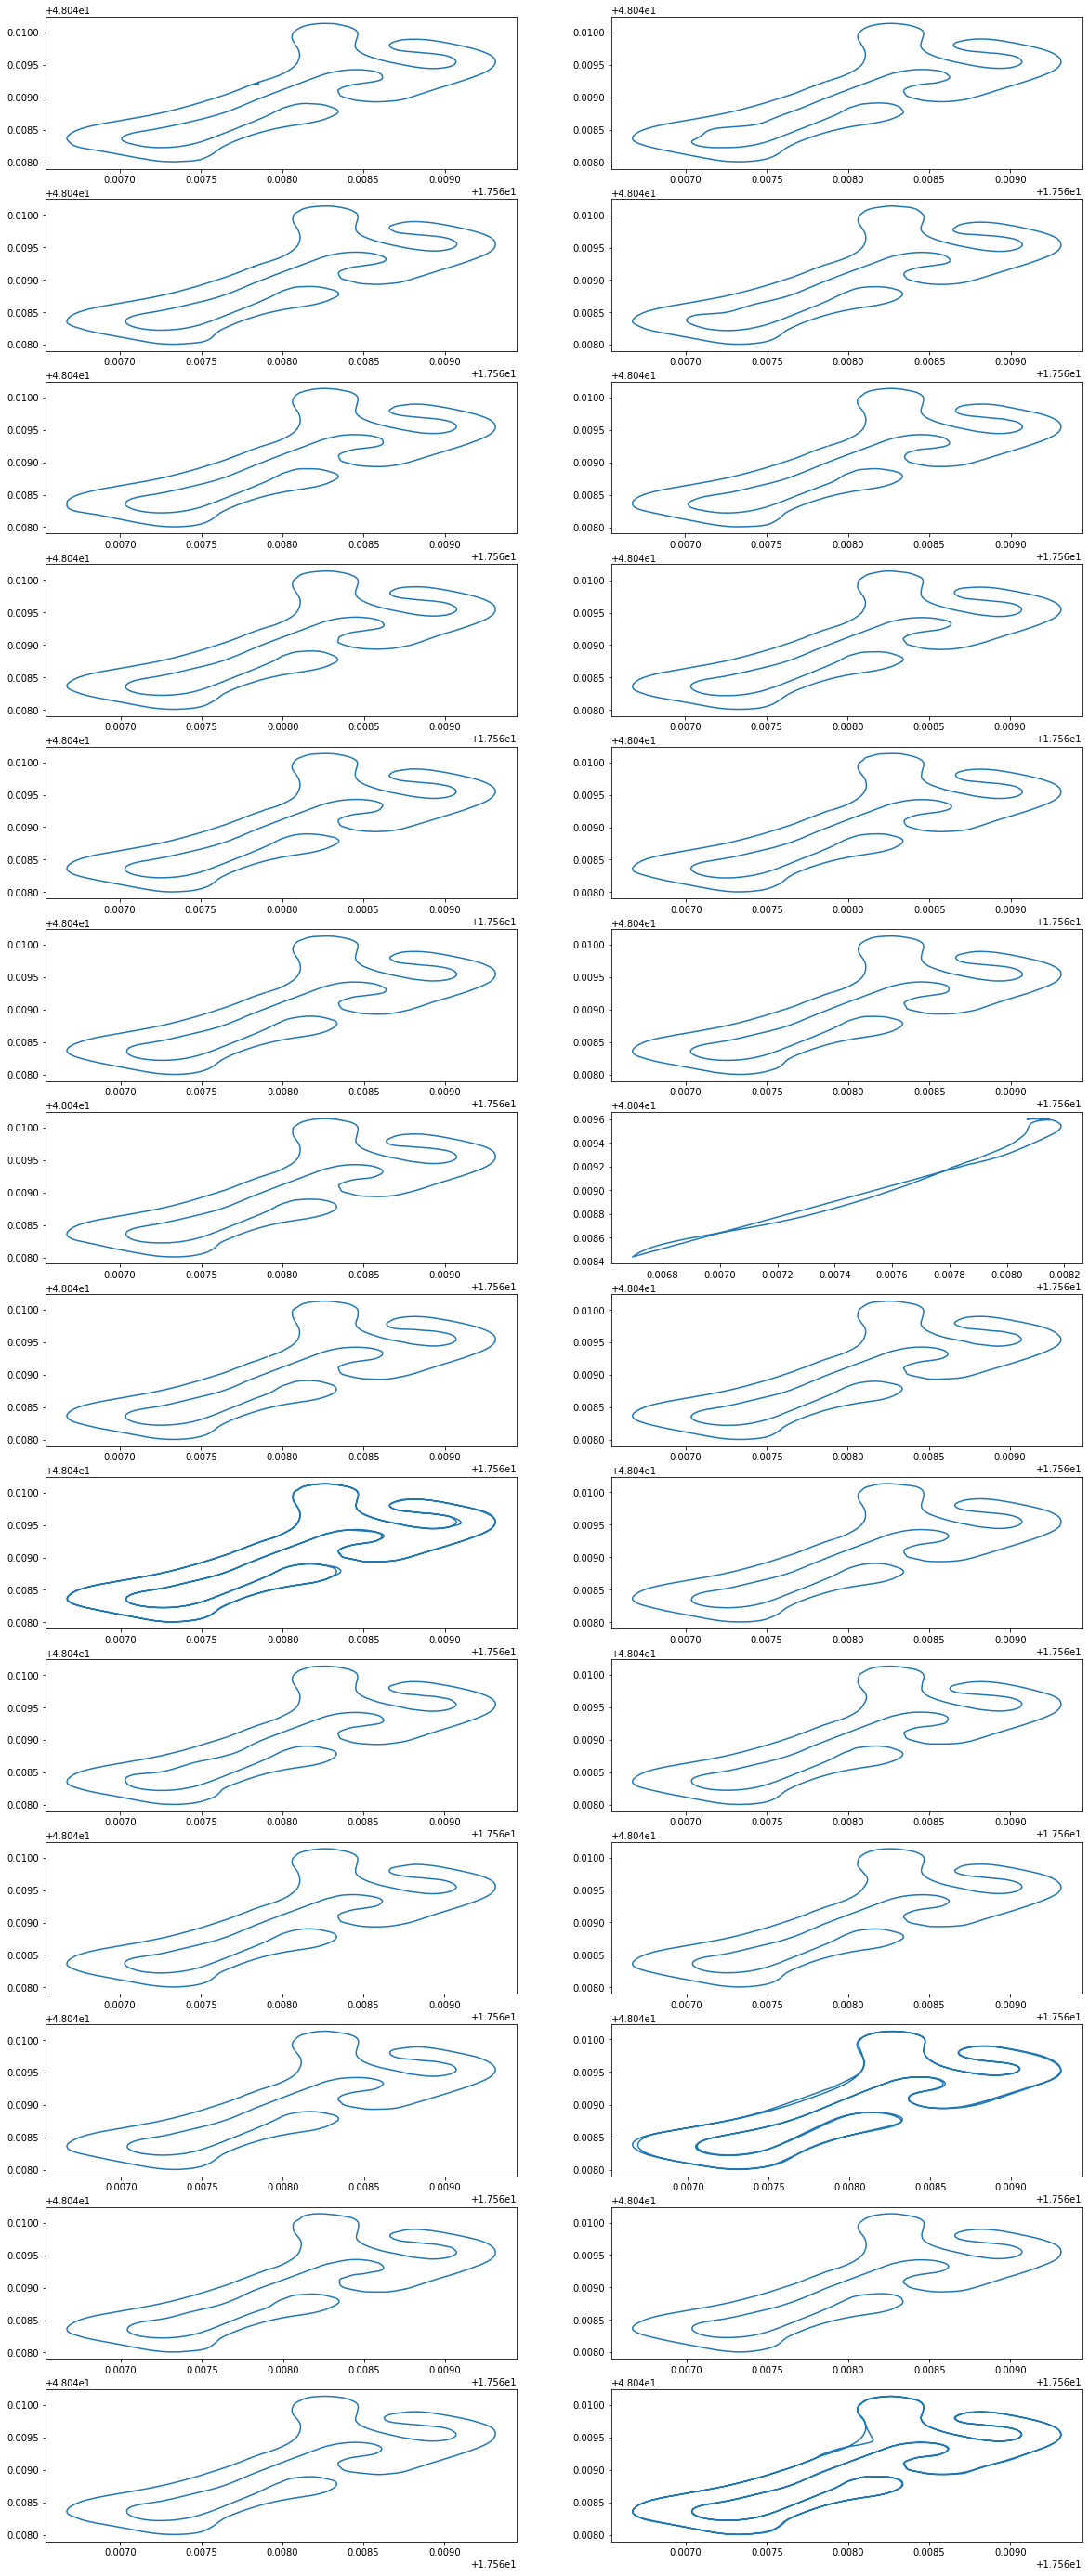

In [75]:
fig, axes = plt.subplots(nrows=len(traces)//2,ncols=2)
fig.set_size_inches(20, 50)

for i, ax in enumerate(axes.flatten()):
    ax.plot(traces1['LON'][traces[i][0]:traces[i][1]], traces1['LAT'][traces[i][0]:traces[i][1]])

In [ ]:
size = 1420
i = 0
laps = list()

while i < len(traces1):
    laps.append([i, i + size])
    i += size
    
laps[-1][1] = len(traces1) - 1
len(laps)

In [ ]:
fig, axes = plt.subplots(nrows=len(laps)//2,ncols=2)
fig.set_size_inches(20, 50)

for i, ax in enumerate(axes.flatten()):
    ax.plot(traces1['LON'][laps[i][0]:laps[i][1]], traces1['LAT'][laps[i][0]:laps[i][1]])

In [ ]:
from sympy import Point, Line

# akoze kolmica na lajnu z prveho a druheho bodu na trase
p1, p2 = Point(0, 0), Point(1, 1)
l1 = Line(p1, p2)

# akoze lajna medzi 2 inymi pointami
p3, p4 = Point(0, 1), Point(1, 0)
l2 = Line(p3, p4)

In [ ]:
l1.intersection(l2)

In [ ]:
# vyssie som zistila intersection a mozem porovnat ci je ten intersection medzi zadanymi bodami p3,p4
# a zaroven ci je medzi bodmi p1 a p2 ktore predstavuju hranuju nasej kolmej lajny
# ako este ziskame tu kolmu lajnu?

# majme x1,y1 a x2,y2 ako prve 2 pointiky na drahe
# a z nich dostaneme vektor, a zaciatok je v bode x1,y1
v1 = [x2 - x1, y2 - y1]
a = x2 - x1
b = y2 - y1
# teraz chceme kolmy vektor a ked v1 == [a, b] tak kolmy vektor je
v2 = [-b, a]
# ten tusim ma rovnaky zaciatocny bod x1,y1 (moja matika je rusty trochu)
# teoreticky tentovektor ani nemusim nikam dalej posuvat, prechadza bodom 0, na nase hranicne body na malej lajne 
# vieme pouzit tento vektor a pociatocny bod ze pripocitame nejaky nasobok vektora do jednej strany a odcitame 
# rovnaky nasobok nech mame rovnaku cast lajny aj na druhej strane

# s tymto staci len preiterovat vsetky traces, ulozit si do listu intervaly pre jednotlive okruhy 
# a potom okruhy ulozit do zvlast filov

In [ ]:
from sympy import Point, Segment
distance_multiplier = 4
points = list()
for i in range(len(traces1)):
    points.append([traces1['LAT'][i], traces1['LON'][i]])

a = points[1][0] - points[0][0]
b = points[1][1] - points[0][1]

pointTop = Point(points[0][0] - b * distance_multiplier, points[0][1] + a * distance_multiplier, evaluate=False)
pointBottom = Point(points[0][0] + b * distance_multiplier, points[0][1] - a * distance_multiplier, evaluate=False)

finishLine = Segment(pointTop, pointBottom, evaluate=False)

laps = list()
laps.append(0)

lapsPairs = list()

for i in range(1, len(points) -1):
    d_h = points[i+1][0] - points[i][0] # d_h stands for distance horizontal
    d_v = points[i+1][1] - points[i][1] # d_v stands for distance vertical
    point1 = Point(points[i][0] - d_h * distance_multiplier, points[i][1] - d_v * distance_multiplier, evaluate=False)
    point2 = Point(points[i+1][0] + d_h * distance_multiplier, points[i+1][1] + d_v * distance_multiplier, evaluate=False)
    if(point1 == point2):
        continue
    toIntersect = Segment(point1, point2, evaluate=False)
    cross = toIntersect.intersection(finishLine)
    if(len(cross) > 0):
        if(len(laps) > 0): # we need to "skip" values, and since we are using range, we can not do that directly
            lastLap = laps[len(laps) -1]
            if(lastLap + 50 > i):
                continue
        lapsPairs.append([laps[len(laps)-1], i+1])
        laps.append(i+1)
        print('Lap at index: {}, pair: {}'.format(i, lapsPairs[len(lapsPairs)-1]))

for i in range(len(laps) - 1):
    lap_df = traces1.iloc[i : i + 1]
    lap_df.to_csv('data/laps/lap{}.csv'.format(i), index=False)

# posledny okruh sme est neulozili tak este ten
lap_df = traces1.iloc[laps[-1]:]
lap_df.to_csv('data/laps/lap{}.csv'.format(len(laps) - 1), index=False)
    

Lap at index: 2983, pair: [0, 2984]
Lap at index: 4138, pair: [2984, 4139]
Lap at index: 5689, pair: [4139, 5690]
Lap at index: 8378, pair: [5690, 8379]
Lap at index: 9478, pair: [8379, 9479]
Lap at index: 11471, pair: [9479, 11472]
Lap at index: 13290, pair: [11472, 13291]
Lap at index: 14734, pair: [13291, 14735]
Lap at index: 16568, pair: [14735, 16569]
Lap at index: 18113, pair: [16569, 18114]
Lap at index: 19765, pair: [18114, 19766]
Lap at index: 20474, pair: [19766, 20475]
Lap at index: 21513, pair: [20475, 21514]
Lap at index: 23024, pair: [21514, 23025]
Lap at index: 24700, pair: [23025, 24701]
Lap at index: 25980, pair: [24701, 25981]
Lap at index: 27973, pair: [25981, 27974]


In [62]:
print(len(traces1))

51099
